In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp



In [20]:
#Carregando o dataset
df = pd.read_csv('../data/creditcard.csv')

In [21]:
#Vendo o shape do dataset
df.shape

(284807, 31)

In [22]:
#Vendo as 5 primeiras linhas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
#Vendo se há valores nulos no dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [24]:
#Vendo a distribuição da variável alvo
df['Class'].value_counts()
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

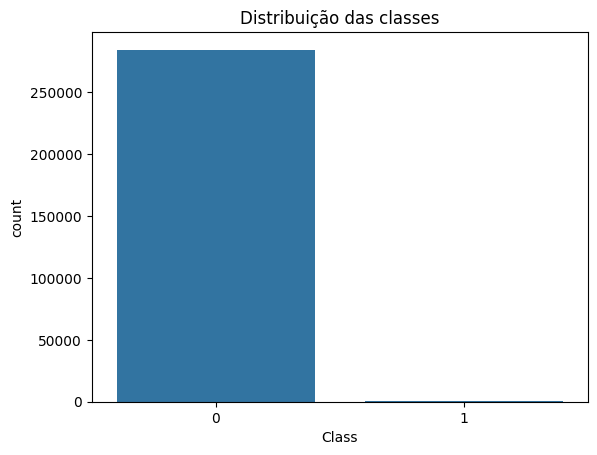

In [25]:
#Plotando a distribuição da variável alvo
sns.countplot(x='Class', data=df)
plt.title('Distribuição das classes')
plt.show()

In [26]:
#Vendo as estatísticas descritivas do dataset
print(df.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [27]:
#Normalizando a coluna 'Amount' 
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [28]:
#Separando as features e o target
X = df.drop('Class', axis=1)
y = df['Class']

In [29]:
#Aplicando SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

pd.Series(y_sm).value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

### Qual o volume de transações de fraude versus não fraude?

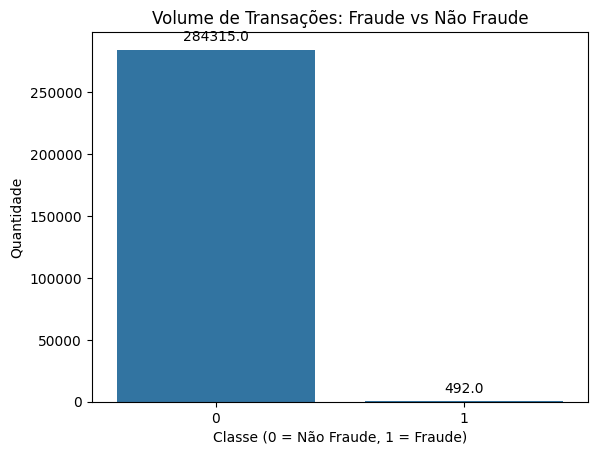

In [30]:
# Adicionar valores exatos nas barras
ax = sns.countplot(x='Class', data=df)
plt.title('Volume de Transações: Fraude vs Não Fraude')
plt.xlabel('Classe (0 = Não Fraude, 1 = Fraude)')
plt.ylabel('Quantidade')

# Adicionar rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

### Qual o percentual de fraudes em relação ao total de transações?


C:\Users\Xno\AppData\Local\Temp\ipykernel_3700\3135667357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=sizes, palette=['#66b3ff', '#ff6666'])


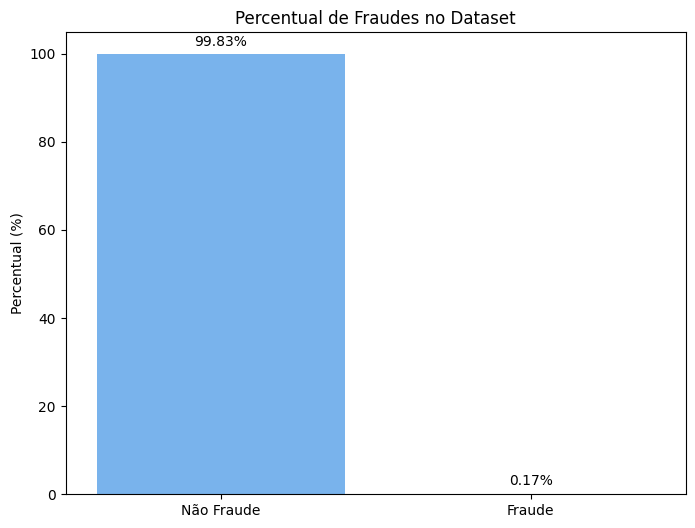

In [31]:
# Calcula o percentual de transações fraudulentas e não fraudulentas
counts = df['Class'].value_counts(normalize=True) * 100  # Frequência relativa em percentual
labels = ['Não Fraude', 'Fraude']
sizes = [counts[0], counts[1]]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=sizes, palette=['#66b3ff', '#ff6666'])
plt.title('Percentual de Fraudes no Dataset')
plt.ylabel('Percentual (%)')

# Adiciona rótulos em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%', 
        (p.get_x() + p.get_width() / 2., height), 
        ha='center', va='center',
        xytext=(0, 9), 
        textcoords='offset points'
    )

plt.show()


### Como a distribuição do valor das transações (Amount) varia entre fraudes e não fraudes?


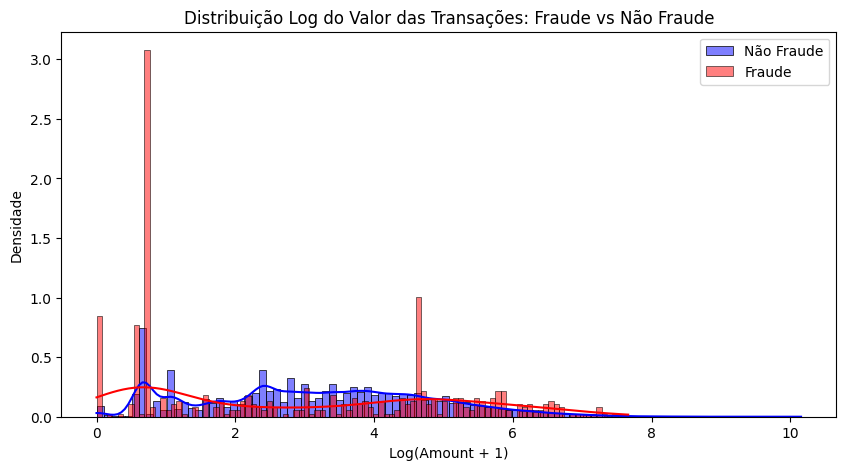

In [32]:
# Cria uma área de figura com tamanho 10x5 polegadas para o gráfico
plt.figure(figsize=(10,5))

# Plota o histograma da coluna 'Amount' (valores das transações) para as transações NÃO FRAUDULENTAS
# Aplica a transformação logarítmica np.log1p para suavizar e lidar com valores extremos
# Usa 100 bins, cor azul, rótulo 'Não Fraude', mostra curva de densidade (kde), e eixo y como densidade
sns.histplot(np.log1p(df[df['Class'] == 0]['Amount']), bins=100, color='blue', label='Não Fraude', kde=True, stat='density')

# Plota o histograma da coluna 'Amount' para transações FRAUDULENTAS, com mesmas configurações, mas cor vermelha e rótulo 'Fraude'
sns.histplot(np.log1p(df[df['Class'] == 1]['Amount']), bins=100, color='red', label='Fraude', kde=True, stat='density')

# Adiciona a legenda para identificar as curvas/barras
plt.legend()

# Define o título do gráfico
plt.title('Distribuição Log do Valor das Transações: Fraude vs Não Fraude')

# Define o nome do eixo x
plt.xlabel('Log(Amount + 1)')

# Define o nome do eixo y
plt.ylabel('Densidade')

# Exibe o gráfico
plt.show()


### Qual é o tempo de ocorrência das fraudes? Elas se concentram em algum período específico?


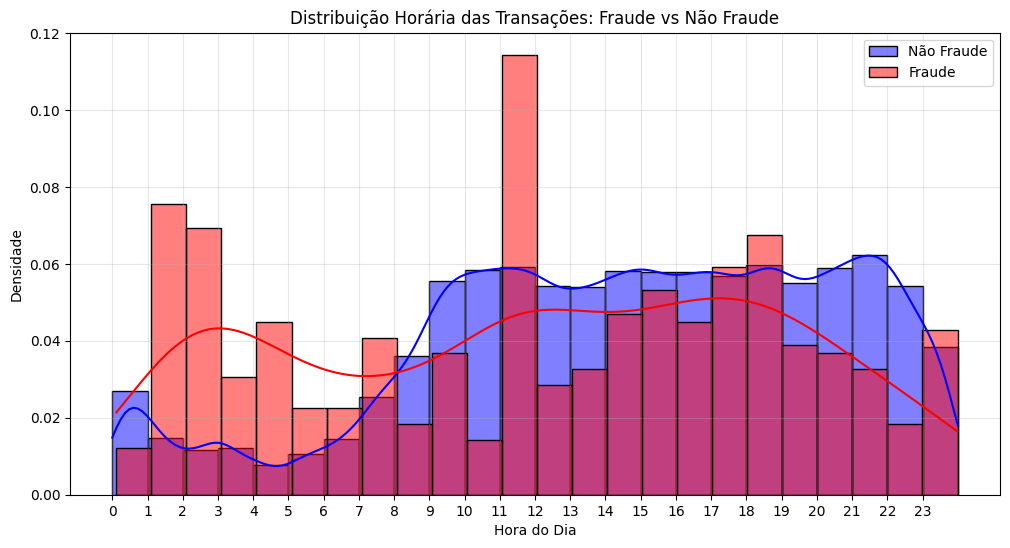

In [33]:
# Cria uma nova coluna 'Hours' convertendo a coluna 'Time' (que está em segundos) para horas do dia (0-23)
# Divide por 3600 para converter segundos em horas, e usa % 24 para obter apenas a hora do dia
df['Hours'] = (df['Time'] / 3600) % 24  

# Cria uma área de figura com tamanho 12x6 polegadas para o gráfico
plt.figure(figsize=(12,6))

# Plota o histograma da coluna 'Hours' para as transações NÃO FRAUDULENTAS
# Usa 24 bins (um para cada hora do dia), cor azul, rótulo 'Não Fraude', curva de densidade e eixo y como densidade
sns.histplot(df[df['Class'] == 0]['Hours'], bins=24, color='blue', label='Não Fraude', kde=True, stat='density')

# Plota o histograma da coluna 'Hours' para transações FRAUDULENTAS
# Mesmas configurações, mas cor vermelha e rótulo 'Fraude'
sns.histplot(df[df['Class'] == 1]['Hours'], bins=24, color='red', label='Fraude', kde=True, stat='density')

# Adiciona a legenda para identificar as curvas/barras
plt.legend()

# Define o título do gráfico
plt.title('Distribuição Horária das Transações: Fraude vs Não Fraude')

# Define o nome do eixo x
plt.xlabel('Hora do Dia')

# Define o nome do eixo y
plt.ylabel('Densidade')

# Define os marcadores do eixo x para mostrar todas as 24 horas (0, 1, 2, ..., 23)
plt.xticks(range(0,24))

# Adiciona uma grade no gráfico com transparência (alpha=0.3) para facilitar a leitura
plt.grid(True, alpha=0.3)

# Exibe o gráfico
plt.show()


### Como se distribuem as principais variáveis transformadas (V1 a V28) nas transações fraudulentas versus não fraudulentas?


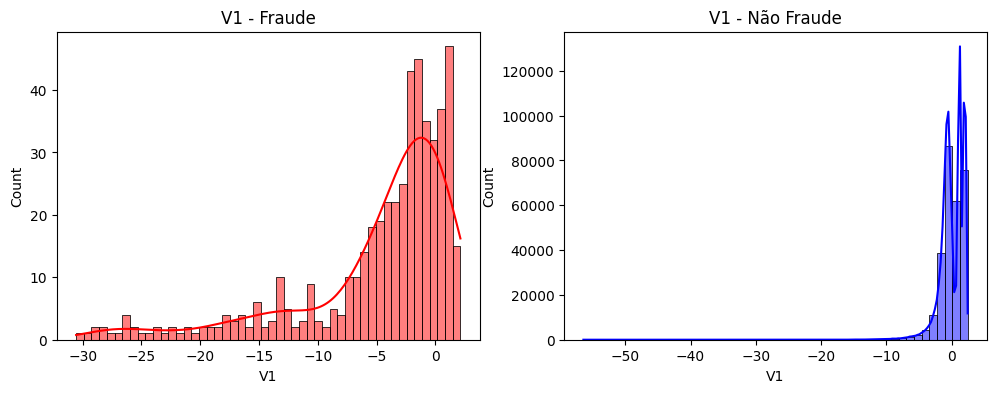

In [34]:
# Cria dois novos DataFrames: um apenas com transações FRAUDULENTAS, outro só com transações NÃO FRAUDULENTAS
df_fraud = df[df['Class'] == 1]
df_nonfraud = df[df['Class'] == 0]

# Cria uma figura com dois subplots (1 linha, 2 colunas), com tamanho 12x4 polegadas
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plota o histograma da variável 'V1' apenas para as transações FRAUDULENTAS no primeiro subplot (ax[0])
# Usa cor vermelha, 50 bins e curva de densidade (kde)
sns.histplot(df_fraud['V1'], ax=ax[0], color='red', bins=50, kde=True)
# Define o título do primeiro subplot
ax[0].set_title('V1 - Fraude')

# Plota o histograma da variável 'V1' para as transações NÃO FRAUDULENTAS no segundo subplot (ax[1])
# Usa cor azul, 50 bins e curva de densidade (kde)
sns.histplot(df_nonfraud['V1'], ax=ax[1], color='blue', bins=50, kde=True)
# Define o título do segundo subplot
ax[1].set_title('V1 - Não Fraude')

# Exibe os dois gráficos lado a lado
plt.show()


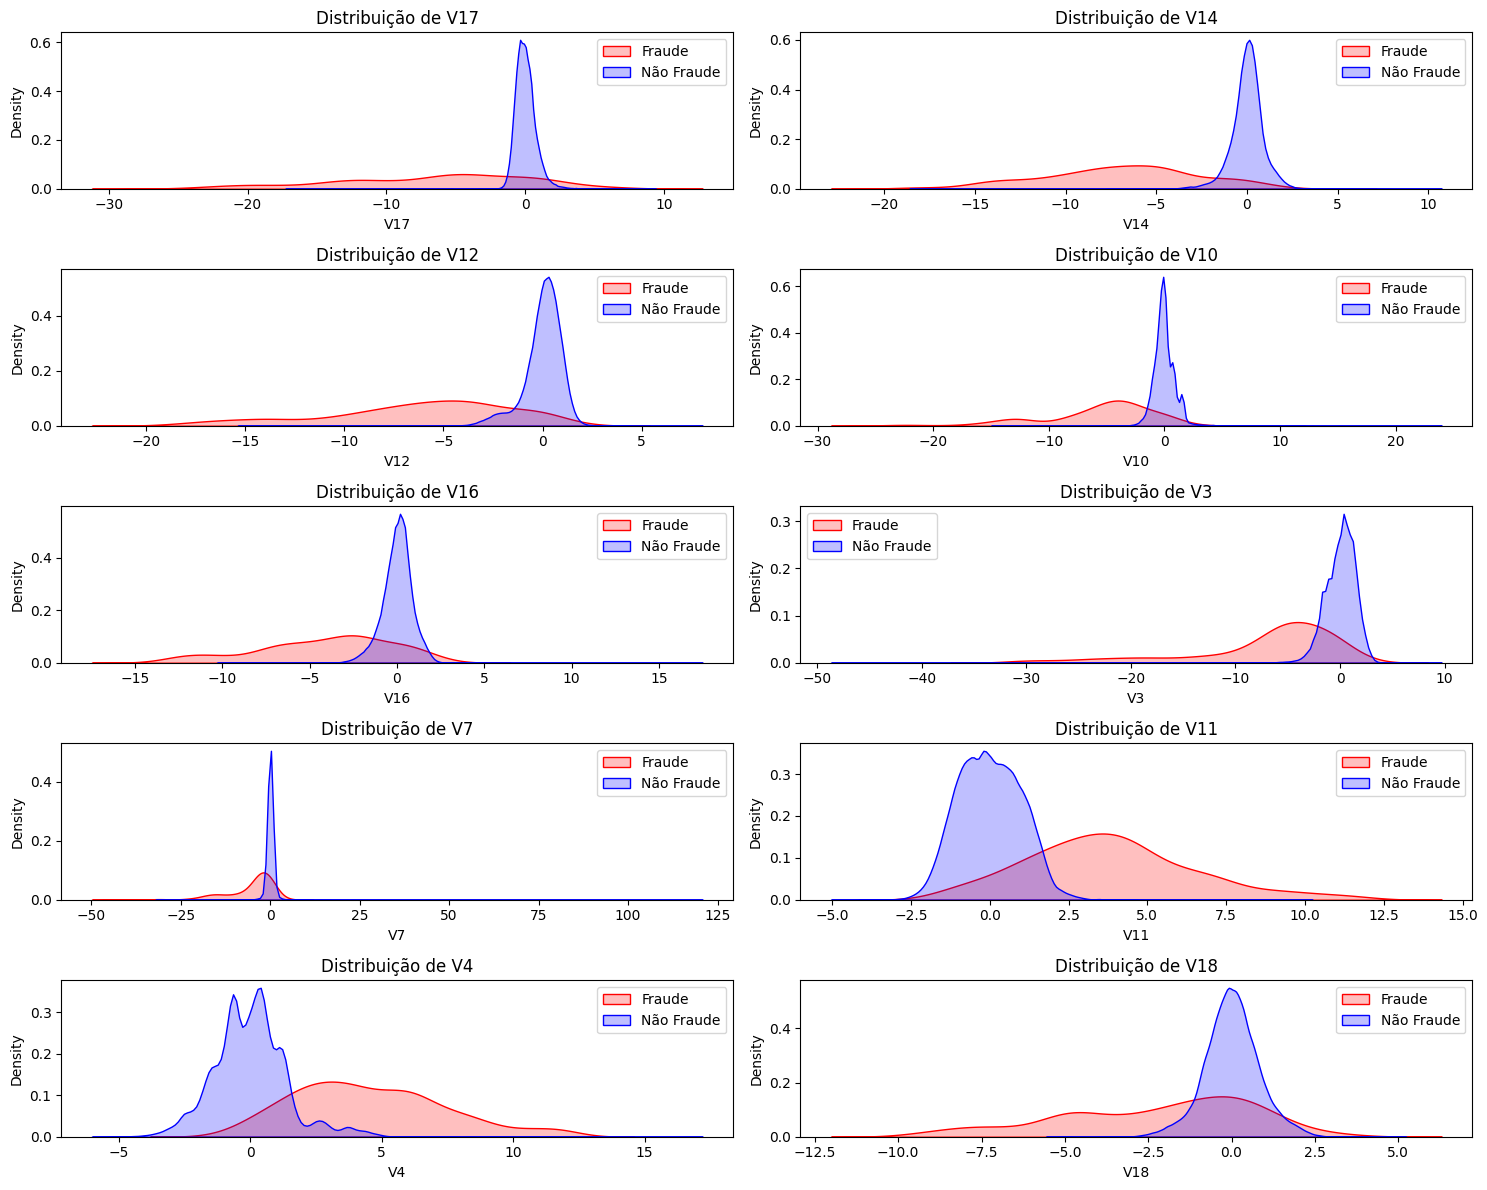

In [40]:
# Garante que cor_class existe e foi calculado corretamente
# cor_class = df.corr()['Class'].drop('Class')

# Calcula a correlação de todas as variáveis com 'Class' (exceto a coluna 'Class' em si)
cor_class = df.corr(numeric_only=True)['Class'].drop('Class')

# Garante que os DataFrames de fraude e não fraude existem
df_fraud = df[df['Class'] == 1]
df_nonfraud = df[df['Class'] == 0]

# Seleciona as 10 variáveis com maior correlação absoluta com 'Class'
top_vars = cor_class.abs().nlargest(10).index.tolist()

plt.figure(figsize=(15, 12))
for i, var in enumerate(top_vars, 1):
    if var not in df.columns:
        print(f'Coluna {var} não existe em df!')
        continue
    plt.subplot(5, 2, i)
    # Remove NaN antes de plotar para evitar erro
    sns.kdeplot(df_fraud[var].dropna(), color='red', label='Fraude', fill=True)
    sns.kdeplot(df_nonfraud[var].dropna(), color='blue', label='Não Fraude', fill=True)
    plt.title(f'Distribuição de {var}')
    plt.legend()
plt.tight_layout()
plt.show()


### Qual a correlação entre as variáveis do dataset? Alguma delas é fortemente correlacionada com a classe?


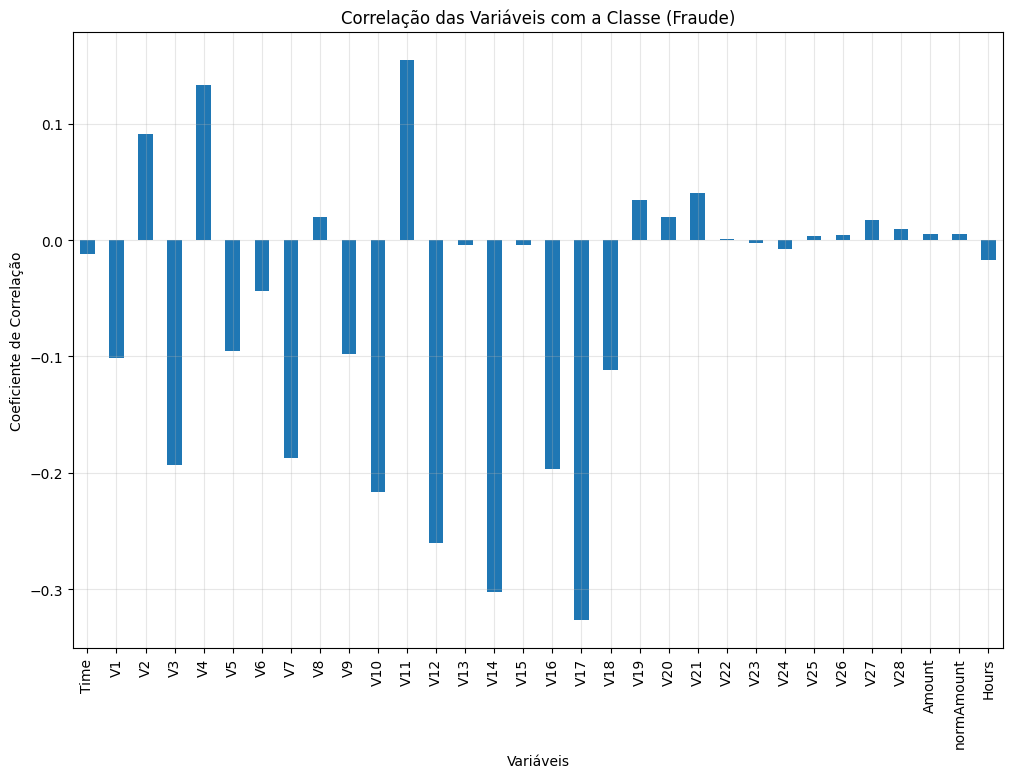

Top 10 correlações positivas:
Time   -0.012323
V1     -0.101347
V2      0.091289
V3     -0.192961
V4      0.133447
V5     -0.094974
V6     -0.043643
V7     -0.187257
V8      0.019875
V9     -0.097733
Name: Class, dtype: float64

Top 10 correlações negativas:
V22           0.000805
V23          -0.002685
V24          -0.007221
V25           0.003308
V26           0.004455
V27           0.017580
V28           0.009536
Amount        0.005632
normAmount    0.005632
Hours        -0.017082
Name: Class, dtype: float64


In [42]:
# Cria uma figura com tamanho 12x8 polegadas para o gráfico de barras
plt.figure(figsize=(12, 8))

# Plota o gráfico de barras das correlações das variáveis com a coluna 'Class' (fraude)
# cor_class deve ser uma Series com os coeficientes de correlação
cor_class.plot(kind='bar')

# Define o título do gráfico
plt.title('Correlação das Variáveis com a Classe (Fraude)')

# Define o rótulo do eixo x
plt.xlabel('Variáveis')

# Define o rótulo do eixo y
plt.ylabel('Coeficiente de Correlação')

# Adiciona grade ao fundo do gráfico para facilitar leitura
plt.grid(True, alpha=0.3)

# Exibe o gráfico
plt.show()

# Exibe no console as 10 variáveis com maior correlação positiva com fraude
print("Top 10 correlações positivas:")
print(cor_class.head(10))

# Exibe no console as 10 variáveis com maior correlação negativa com fraude
print("\nTop 10 correlações negativas:")
print(cor_class.tail(10))


### Quais variáveis apresentam maior importância/impacto na diferenciação entre fraude e não fraude?


C:\Users\Xno\AppData\Local\Temp\ipykernel_3700\2981667508.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_importances, palette='viridis')


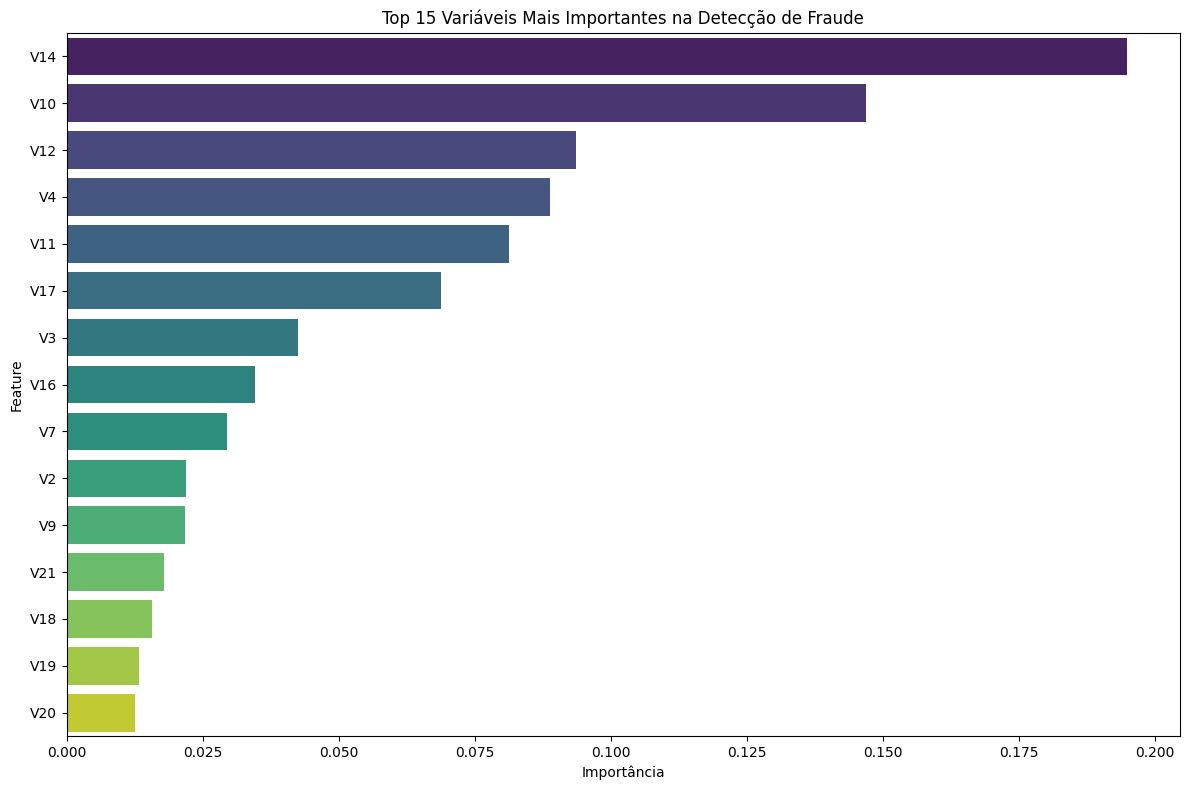

In [45]:
# Ajusta o modelo Random Forest aos dados, utilizando ajuste para classes desbalanceadas
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X, y)

# Pega a importância de cada variável (feature_importances_) do modelo treinado
importances = model.feature_importances_

# Cria um DataFrame com os nomes das features e suas importâncias
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordena as variáveis da mais importante para a menos importante
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Seleciona as 15 features mais importantes
top_importances = importances_df.head(15)

# Plota um gráfico de barras das 15 principais importâncias
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_importances, palette='viridis')

plt.title('Top 15 Variáveis Mais Importantes na Detecção de Fraude')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

### Como o valor médio das transações fraudulentas se compara ao das não fraudulentas?


Estatísticas de valor por classe:
             mean  median         std  min       max
Class                                               
0       88.291022   22.00  250.105092  0.0  25691.16
1      122.211321    9.25  256.683288  0.0   2125.87


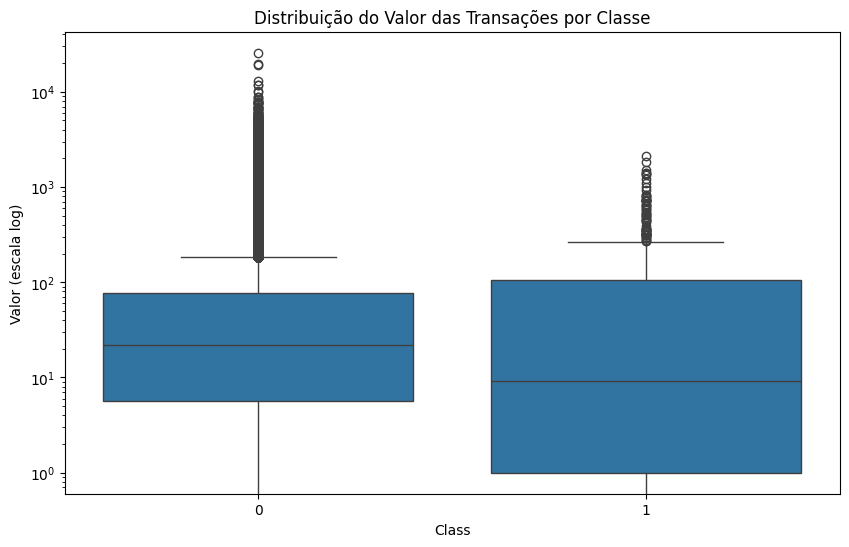


Teste t para diferença de médias: p-value = 0.0035605189


In [46]:
# Calcula estatísticas descritivas (média, mediana, desvio padrão, valor mínimo e máximo)
# para o valor das transações ('Amount'), separando por classe (fraude ou não fraude)
stats = df.groupby('Class')['Amount'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Estatísticas de valor por classe:")
print(stats)

# Cria uma figura com tamanho 10x6 polegadas
plt.figure(figsize=(10, 6))

# Plota um boxplot do valor das transações (Amount) por classe (fraude ou não fraude)
sns.boxplot(x='Class', y='Amount', data=df)

# Define o título do gráfico
plt.title('Distribuição do Valor das Transações por Classe')

# Aplica escala logarítmica no eixo y para melhor visualizar os valores e lidar com outliers
plt.yscale('log')  # Escala logarítmica para lidar com outliers
plt.ylabel('Valor (escala log)')

# Exibe o gráfico
plt.show()

# Importa a função de teste t da biblioteca scipy
from scipy import stats

# Realiza o teste t para comparar as médias dos valores entre transações fraudulentas e não fraudulentas
# equal_var=False indica que as variâncias podem ser diferentes entre os grupos
t_stat, p_value = stats.ttest_ind(
    df[df['Class'] == 1]['Amount'], 
    df[df['Class'] == 0]['Amount'],
    equal_var=False
)

# Exibe o p-value do teste t, indicando se existe diferença significativa entre as médias
print(f"\nTeste t para diferença de médias: p-value = {p_value:.10f}")


### Qual é a distribuição da duração (Time) das transações fraudulentas frente às normais?


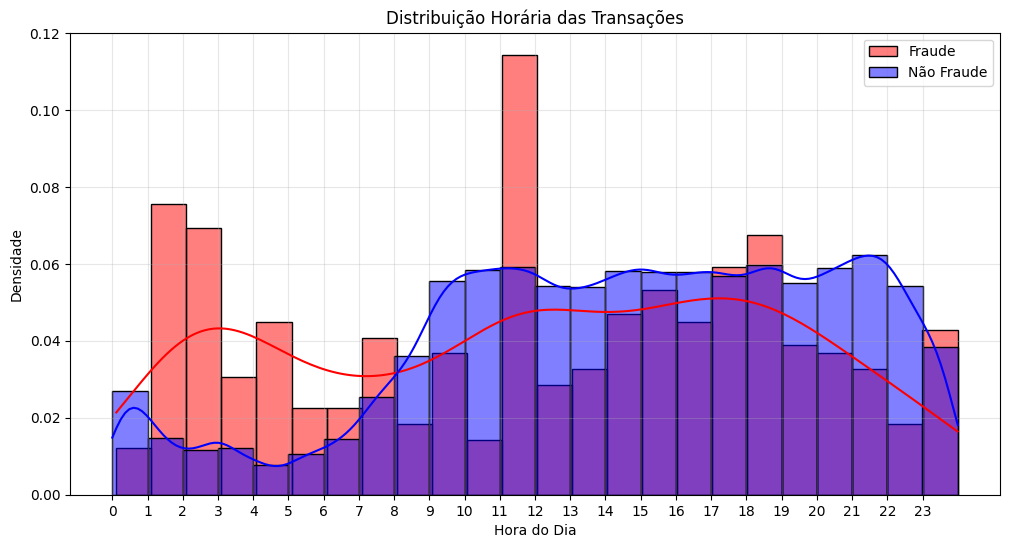

Teste Kolmogorov-Smirnov: p-value = 0.0000000000


In [47]:
# Adiciona uma coluna 'Hours' convertendo a coluna 'Time' (segundos) para horas do dia (0-23)
df['Hours'] = (df['Time'] / 3600) % 24

# Cria uma figura de tamanho 12x6 polegadas
plt.figure(figsize=(12,6))

# Plota histograma da distribuição horária das transações FRAUDULENTAS
# Usa 24 bins, cor vermelha, rótulo 'Fraude', curva de densidade
sns.histplot(df[df['Class']==1]['Hours'], bins=24, color='red', label='Fraude', kde=True, stat='density')

# Plota histograma da distribuição horária das transações NÃO FRAUDULENTAS
# Usa 24 bins, cor azul, rótulo 'Não Fraude', curva de densidade, alpha=0.5 para deixar transparente
sns.histplot(df[df['Class']==0]['Hours'], bins=24, color='blue', label='Não Fraude', kde=True, stat='density', alpha=0.5)

# Configuração dos eixos, título, grade e legenda
plt.title('Distribuição Horária das Transações')
plt.xlabel('Hora do Dia')
plt.ylabel('Densidade')
plt.xticks(range(0,24))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Separa as horas das transações fraudulentas e não fraudulentas
fraud_hours = df[df['Class']==1]['Hours']
nonfraud_hours = df[df['Class']==0]['Hours']

# Testa se as distribuições horárias dos dois grupos são estatisticamente diferentes usando o teste de Kolmogorov-Smirnov
stat, p_value = ks_2samp(fraud_hours, nonfraud_hours)
print(f"Teste Kolmogorov-Smirnov: p-value = {p_value:.10f}")


### Existem outliers, especialmente em Amount, que impactam a identificação de fraudes?


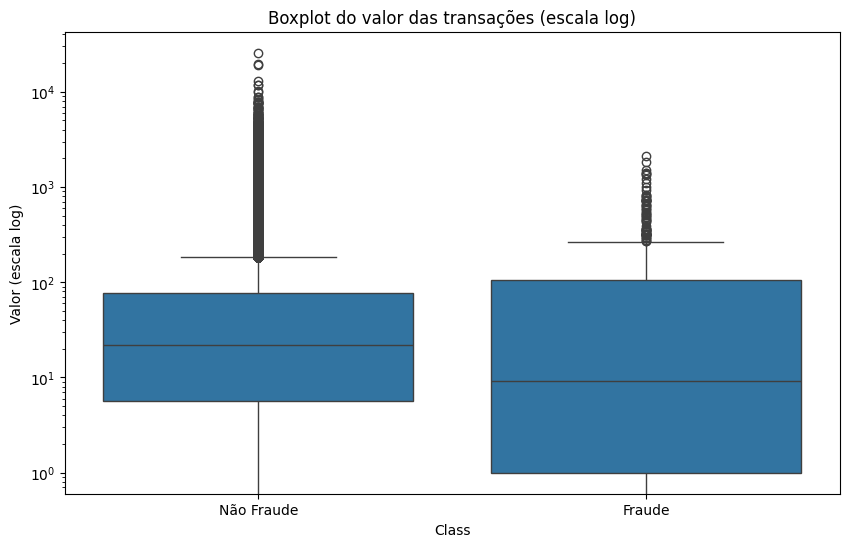

Não Fraude: 31862 outliers, valor máximo = 25691.16
Fraude: 69 outliers, valor máximo = 2125.87


In [48]:
# Cria uma figura com tamanho 10x6 polegadas
plt.figure(figsize=(10,6))

# Plota boxplot do valor das transações ('Amount') separado pela classe (0: Não Fraude, 1: Fraude)
sns.boxplot(x='Class', y='Amount', data=df)

# Ajusta a escala do eixo y para ser logarítmica para facilitar leitura com muitos outliers
plt.yscale('log')

# Define os rótulos do eixo x para mostrar 'Não Fraude' (0) e 'Fraude' (1)
plt.xticks([0,1], ['Não Fraude', 'Fraude'])

# Define o título e o rótulo do eixo y
plt.title('Boxplot do valor das transações (escala log)')
plt.ylabel('Valor (escala log)')

# Exibe o gráfico
plt.show()

# Função para contar outliers (valores extremos) em uma coluna, usando regra do IQR (intervalo interquartílico)
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)        # 1º quartil (25%)
    Q3 = df[column].quantile(0.75)        # 3º quartil (75%)
    IQR = Q3 - Q1                         # Intervalo interquartílico
    lower_bound = Q1 - 1.5 * IQR          # Limite inferior para outlier
    upper_bound = Q3 + 1.5 * IQR          # Limite superior para outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # Seleciona os outliers
    return len(outliers), outliers[column].max()  # Retorna quantidade e valor máximo dos outliers

# Conta outliers para as transações NÃO FRAUDULENTAS ('Class'==0) e obtém o valor máximo entre eles
outliers_nonfraud, max_nonfraud = count_outliers(df[df['Class']==0], 'Amount')

# Conta outliers para transações FRAUDULENTAS ('Class'==1) e obtém o valor máximo entre eles
outliers_fraud, max_fraud = count_outliers(df[df['Class']==1], 'Amount')

# Exibe quantidade de outliers e valor máximo para cada grupo
print(f"Não Fraude: {outliers_nonfraud} outliers, valor máximo = {max_nonfraud}")
print(f"Fraude: {outliers_fraud} outliers, valor máximo = {max_fraud}")


### A normalização das variáveis (Amount e Time) influencia a separabilidade das classes?


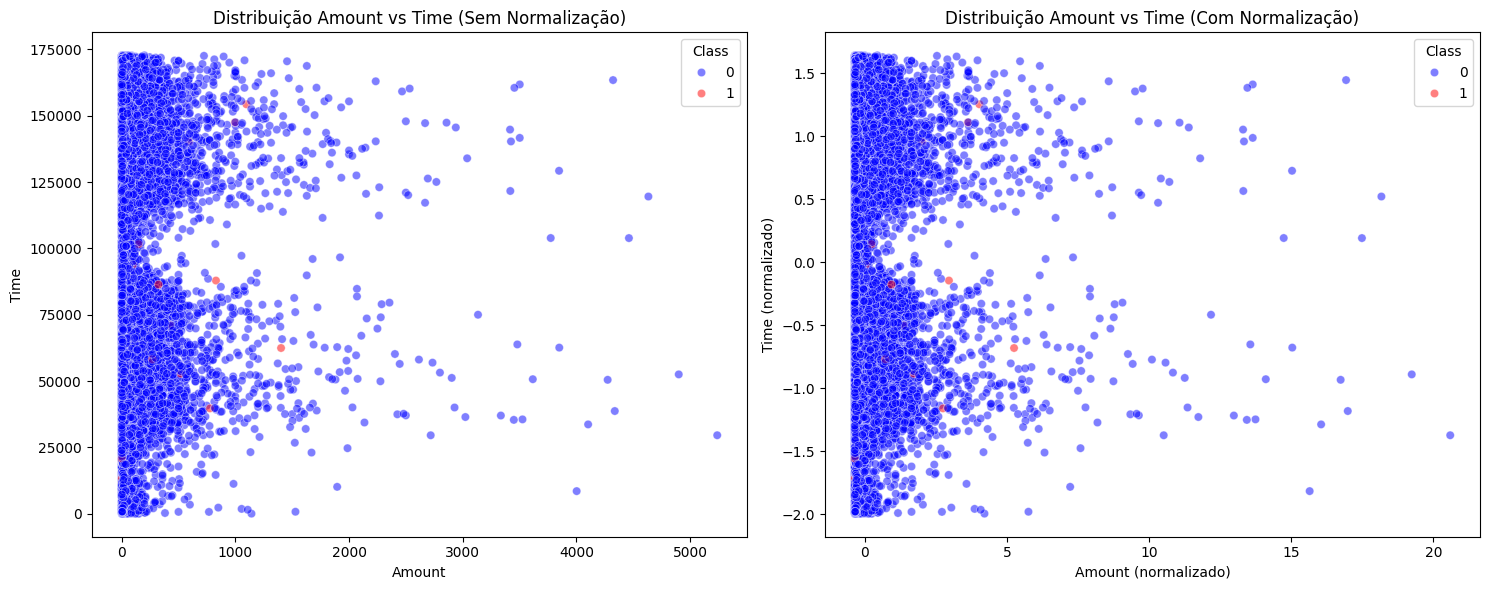

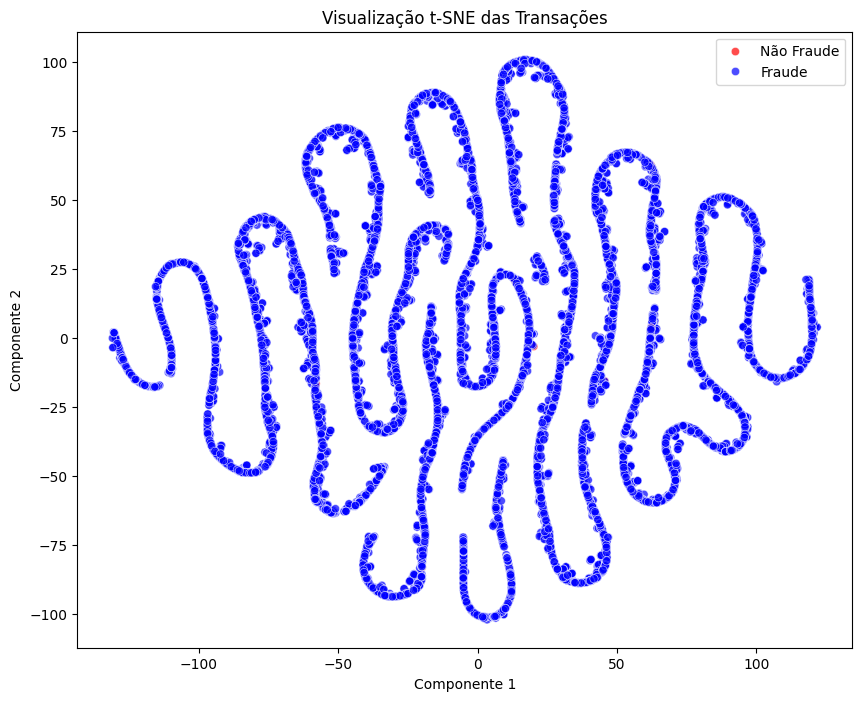

In [49]:
# Amostra 10% dos dados aleatoriamente para melhorar a visualização (reduz taxa de pontos plotados)
df_sample = df.sample(frac=0.1, random_state=42)

# Cria figura e dois subplots lado a lado, tamanho 15x6 polegadas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot (gráfico de dispersão) SEM normalização
# Eixo x: Amount (valor da transação), y: Time, cor pela classe
sns.scatterplot(
    data=df_sample, x='Amount', y='Time', hue='Class', 
    palette={0: 'blue', 1: 'red'}, alpha=0.5, ax=axes[0]
)
axes[0].set_title('Distribuição Amount vs Time (Sem Normalização)')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Time')

# Normaliza as colunas Amount e Time para média 0 e desvio padrão 1 (padronização)
df_norm = df.copy()
scaler = StandardScaler()
df_norm[['Amount', 'Time']] = scaler.fit_transform(df_norm[['Amount', 'Time']])

# Nova amostra de 10% dos dados já normalizados
df_norm_sample = df_norm.sample(frac=0.1, random_state=42)
# Scatter plot COM normalização
sns.scatterplot(
    data=df_norm_sample, x='Amount', y='Time', hue='Class', 
    palette={0: 'blue', 1: 'red'}, alpha=0.5, ax=axes[1]
)
axes[1].set_title('Distribuição Amount vs Time (Com Normalização)')
axes[1].set_xlabel('Amount (normalizado)')
axes[1].set_ylabel('Time (normalizado)')

# Ajusta o layout
plt.tight_layout()
plt.show()

# Visualização t-SNE (redução de dimensionalidade para 2D)
# Amostra 5% dos dados para processamento mais rápido
df_tsne = df.sample(frac=0.05, random_state=42)
X = df_tsne.drop('Class', axis=1)  # Features (sem a coluna alvo)
y = df_tsne['Class']               # Classe alvo

# Aplica t-SNE para reduzir para 2 dimensões
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plota os pontos em 2D, colorindo por classe
plt.figure(figsize=(10,8))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1], hue=y, 
    palette={0: 'blue', 1: 'red'}, alpha=0.7
)
plt.title('Visualização t-SNE das Transações')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(['Não Fraude', 'Fraude'])
plt.show()


### Como seria a matriz de confusão de um modelo simples de classificação (ex: Logistic Regression) sem balanceamento?


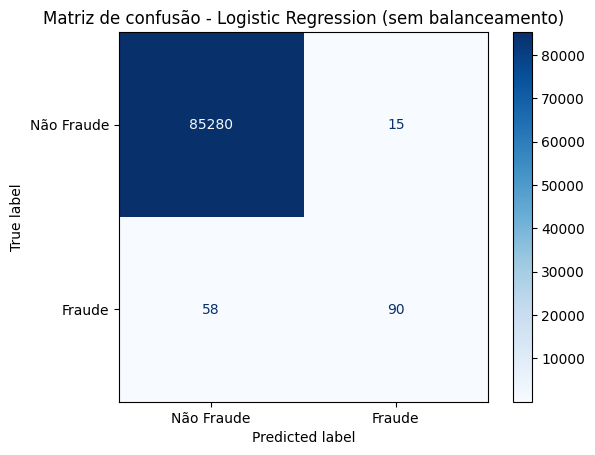


Relatório de Classificação:
              precision    recall  f1-score   support

  Não Fraude       1.00      1.00      1.00     85295
      Fraude       0.86      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Acurácia: 0.9991
Precisão: 0.8571
Recall: 0.6081
F1-Score: 0.7115
AUC-ROC: 0.9587


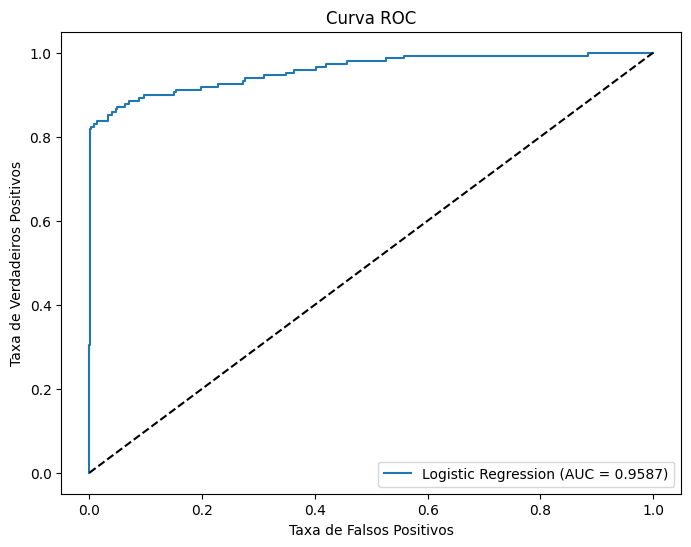

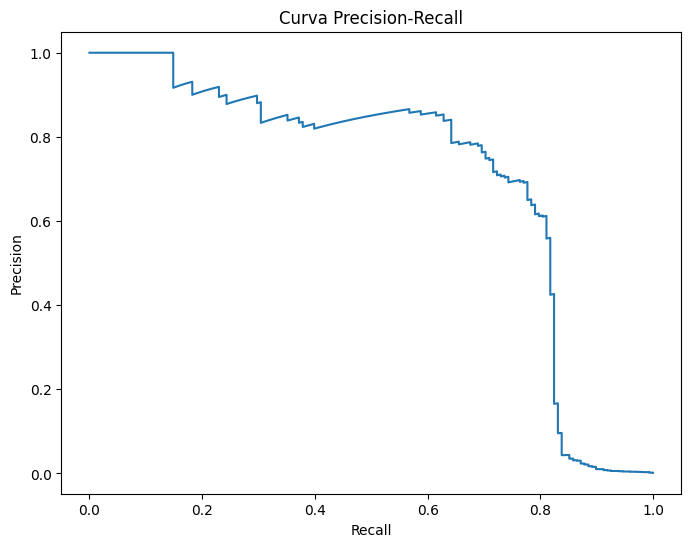

In [50]:
# Separa features (X) e variável alvo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Normaliza todas as variáveis numéricas para média 0 e desvio padrão 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide os dados em treino e teste (70% treino, 30% teste)
# stratify=y garante proporcionalidade das classes nos dois conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Cria e treina modelo de regressão logística SEM balanceamento de classe
modelo = LogisticRegression(max_iter=1000, class_weight=None)
modelo.fit(X_train, y_train)

# Faz previsões para os dados de teste
y_pred = modelo.predict(X_test)
y_pred_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidade de ser classe 1 (fraude)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Fraude", "Fraude"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusão - Logistic Regression (sem balanceamento)")
plt.show()

# Relatório detalhado de classificação (precision, recall, f1, support)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=["Não Fraude", "Fraude"]))

# Métricas principais
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Curva ROC (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal (classificador aleatório)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()
